### Things to do
#### 1.import pandas, numpy, scikitlearn - done
#### 2. read to cleansed file, print.head, info - done
#### 3. drop rows where target column is null - done by ETL
#### 4. do EDA on most columns vs target column (hist, scatter) - done
#### 5. Below are Derived Features - done
   . Add additional insights from "AvgChargePerMonth" = TotalCharges/max(tenure,1) - done
   . AddOnInternetServicesCount (numeric) - done
   . HasInternet, HasPhone, HasBunldeServices - done
#### 6. check .describe() for numerical columns - done. 
#### 7. Identify target, input columns, numeric and categorical columns
#### 8. split training, validation and test sets (60%,20%, 20%)
#### 9. imputation (simple Imputer??) - done by ETL process
#### 10. scale numeric columns
#### 11. one hot encoding for categorical columns
#### 12. should I save all processed splits to pqrquet?


#### Import Libs and Datset

In [771]:
import os
import pandas as pd
import numpy as np

raw_df_path = "../data/processed/customers_clean_for_model.csv"

raw_df = pd.read_csv(raw_df_path)
raw_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,customerID,Churn,id_count,is_duplicate
0,Female,No,Yes,No,29.0,No,No phone service,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,7590-VHVEG,No,2,True
1,Male,No,No,No,34.0,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,5575-GNVDE,No,1,False
2,Male,No,No,No,29.0,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,3668-QPYBK,Yes,1,False
3,Male,No,No,No,45.0,No,No phone service,DSL,Yes,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,7795-CFOCW,No,1,False
4,Female,No,No,No,2.0,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,9237-HQITU,Yes,1,False


In [772]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8099 entries, 0 to 8098
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            8099 non-null   object 
 1   SeniorCitizen     8099 non-null   object 
 2   Partner           8099 non-null   object 
 3   Dependents        8099 non-null   object 
 4   tenure            8099 non-null   float64
 5   PhoneService      8099 non-null   object 
 6   MultipleLines     8099 non-null   object 
 7   InternetService   8099 non-null   object 
 8   OnlineSecurity    8099 non-null   object 
 9   OnlineBackup      8099 non-null   object 
 10  DeviceProtection  8099 non-null   object 
 11  TechSupport       8099 non-null   object 
 12  StreamingTV       8099 non-null   object 
 13  StreamingMovies   8099 non-null   object 
 14  Contract          8099 non-null   object 
 15  PaperlessBilling  8099 non-null   object 
 16  PaymentMethod     8099 non-null   object 


### EDA and Visualization

In [773]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


In [774]:
px.histogram(raw_df, x='gender' ,title='gender vs Churn', color='Churn')

In [775]:
px.histogram(raw_df, x='SeniorCitizen' ,title='SeniorCitizen vs Churn', color='Churn')

#### Observation: SeniorCitizens tend to Churn More

In [776]:
px.histogram(raw_df, x='Partner' ,title='Partner vs Churn', color='Churn')

### Observation: Customer without Partner tend to Churn more

In [777]:
px.histogram(raw_df, x='Dependents' ,title='Dependents vs Churn', color='Churn')

### Observation: Customer without Dependents tend to Churn more

In [778]:
px.histogram(raw_df, x='tenure' ,title='tenure vs Churn', color='Churn')

### Observation: 
1. Early customers (tenure < 6/7 months) churned more
2. Churn spike at 28/29 months, may be end of 2 year Contract + 4months exentions or trail?  

In [779]:
px.histogram(raw_df, x='PhoneService' ,title='PhoneService vs Churn', color='Churn')

In [780]:
px.histogram(raw_df, x='MultipleLines' ,title='MultipleLines vs Churn', color='Churn')

In [781]:
px.histogram(raw_df, x='InternetService' ,title='InternetService vs Churn', color='Churn')

### Observation: 
1. Customers with "Fiber Optic" type InternetService Churned more
2. May be "Fiber Optic" costed more or Connectivity Issue for fiber being delicate

In [782]:
px.histogram(raw_df, x='Contract' ,title='Contract vs Churn', color='Churn')

### Observations:
1. Customers with Month-to-Month contract Churned More!!! 
2. Customers under 1 year contract churned less
3. Chustomers under 2 year contract churned way less!!!

In [783]:
px.histogram(raw_df, x='PaperlessBilling' ,title='PaperlessBilling vs Churn', color='Churn')

### Observations: Customers with PaperlessBilling Churned More!!!

In [784]:
px.histogram(raw_df, x='PaymentMethod' ,title='PaymentMethod vs Churn', color='Churn')

### Observations: 
1. Customers with Electronic Check Payment Churned More!!! (almost 40%)
2. Customers with traditional payments like Mail check, Bank, CC churned way less.

In [785]:
px.histogram(raw_df, x='MonthlyCharges' ,title='MonthlyCharges vs Churn', color='Churn')

#### Observation: L
1. Looks like Customers with $70 monthly charges, are Churning More. 
2. $70 could be standard charges for customers with Monthly-to-Monthly Contract.

In [786]:
px.histogram(raw_df, x='TotalCharges' ,title='TotalCharges vs Churn', color='Churn')

### Observations: Customers whose total charges below $1,500, Churned More!!!

In [787]:
px.scatter(raw_df, title = 'Tenure vs Total charges', x = 'tenure', y = 'TotalCharges', color = 'Churn')

#### Observation : 
1. Tenure and Total Charges have +ve correlation, as predicted many Customers Churn at tenure = 29 months
2. May be customers who were under 2year contract, give it another try for 4-5 months

# Derived Features

In [788]:
raw_df['AvgChargePerMonth'] = raw_df['TotalCharges'] / np.maximum(raw_df['tenure'], 1)
raw_df[['AvgChargePerMonth', 'TotalCharges', 'tenure']].describe()

,AvgChargePerMonth,TotalCharges,tenure
count,8099.000000,8099.000000,8099.000000
mean,88.177404,2298.197841,32.162582
std,334.193203,2359.207594,23.696913
min,0.000000,0.000000,0.000000
25%,29.600000,398.900000,10.000000
50%,69.350000,1389.850000,29.000000
75%,90.825000,3770.750000,53.000000
max,10000.000000,20000.000000,72.000000


### HasInternet, HasPhone, HasBunldeServices and AddOnInternetServicesCount

In [789]:
def print_unique_values_in_df(df, max_cols=20, max_values=20):
    """
    Print unique values for object/category columns.
    Limit the number of columns/values printed to keep it readable.
    """
    obj_cols = [c for c in df.columns if df[c].dtype == "object"]
    print(f"\nObject columns (showing up to {max_cols} columns): {len(obj_cols)} total\n")
    for col in obj_cols[:max_cols]:
        unique_vals = df[col].unique()
        n_unique = len(unique_vals)
        print(f"Column: {col}  |  n_unique = {n_unique}")
        print("  Sample unique values:", unique_vals[:max_values])
        print("-" * 60)

raw_df['HasInternet'] = (raw_df['InternetService'] != 'No').map({True: 'Yes', False: 'No'})
raw_df['HasPhone'] = (raw_df['PhoneService'] != 'No').map({True: 'Yes', False: 'No'})
raw_df['HasBundleService'] = (raw_df['HasInternet'] == 'Yes') & (raw_df['HasPhone'] == 'Yes')
raw_df['HasBundleService'] = raw_df['HasBundleService'].map({True: 'Yes', False: 'No'})

internet_dependents = [
        "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport",
        "StreamingTV", "StreamingMovies"]

raw_df['AddOnInternetServicesCount'] = raw_df[internet_dependents].eq('Yes').sum(axis=1).astype('object')

print_unique_values_in_df(raw_df[['HasInternet', 'HasPhone', 'HasBundleService', 'AddOnInternetServicesCount']])   
print(raw_df['AddOnInternetServicesCount'].value_counts())


Object columns (showing up to 20 columns): 4 total

Column: HasInternet  |  n_unique = 2
  Sample unique values: ['Yes' 'No']
------------------------------------------------------------
Column: HasPhone  |  n_unique = 2
  Sample unique values: ['No' 'Yes']
------------------------------------------------------------
Column: HasBundleService  |  n_unique = 2
  Sample unique values: ['No' 'Yes']
------------------------------------------------------------
Column: AddOnInternetServicesCount  |  n_unique = 7
  Sample unique values: [1 2 3 0 4 5 6]
------------------------------------------------------------
AddOnInternetServicesCount
0    2644
2    1264
3    1263
1    1146
4     922
5     603
6     257
Name: count, dtype: int64


In [790]:
px.histogram(raw_df, x='HasBundleService' ,title='HasBundleService vs Churn', color='Churn')

In [791]:
px.histogram(raw_df, x='AddOnInternetServicesCount' ,title='AddOnInternetServicesCount vs Churn', color='Churn')

### Observation: Customers tend to Churn Less if they have more Additional Internet Services. 

In [792]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8099 entries, 0 to 8098
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      8099 non-null   object 
 1   SeniorCitizen               8099 non-null   object 
 2   Partner                     8099 non-null   object 
 3   Dependents                  8099 non-null   object 
 4   tenure                      8099 non-null   float64
 5   PhoneService                8099 non-null   object 
 6   MultipleLines               8099 non-null   object 
 7   InternetService             8099 non-null   object 
 8   OnlineSecurity              8099 non-null   object 
 9   OnlineBackup                8099 non-null   object 
 10  DeviceProtection            8099 non-null   object 
 11  TechSupport                 8099 non-null   object 
 12  StreamingTV                 8099 non-null   object 
 13  StreamingMovies             8099 

# Test, Train and Validation Split

In [793]:
from sklearn.model_selection import train_test_split

train_val_df, test_df = train_test_split(raw_df, test_size = 0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size = 0.25, random_state=42)

print('train_df.shape:', train_df.shape)
print('val_df.shape:', val_df.shape)
print('test_df.shape:', test_df.shape)


train_df.shape: (4859, 28)
val_df.shape: (1620, 28)
test_df.shape: (1620, 28)


# Identify Input and Target columns
### 1.Drop CusomterID column
### 2.Drop id_count column
### 3.Drop Target Columns

In [794]:
columns_to_drop = ['customerID','id_count','Churn']
target_col = 'Churn'
input_cols = [col for col in raw_df.columns if col not in columns_to_drop]
print(input_cols)
print(target_col)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'is_duplicate', 'AvgChargePerMonth', 'HasInternet', 'HasPhone', 'HasBundleService', 'AddOnInternetServicesCount']
Churn


In [795]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [796]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes(include=['object', 'bool']).columns.tolist()

print(numeric_cols)
print(categorical_cols)

['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgChargePerMonth']
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'is_duplicate', 'HasInternet', 'HasPhone', 'HasBundleService', 'AddOnInternetServicesCount']


# Statistical Summary on Numerical Columns

In [797]:
train_inputs[numeric_cols].describe()

,tenure,MonthlyCharges,TotalCharges,AvgChargePerMonth
count,4859.000000,4859.000000,4859.000000,4859.000000
mean,31.949055,65.614884,2297.776831,92.281213
std,23.593996,30.537655,2375.868987,388.204808
min,0.000000,0.000000,0.000000,0.000000
25%,10.000000,44.125000,396.200000,29.859259
50%,29.000000,70.400000,1389.850000,69.480000
75%,53.000000,88.325000,3763.525000,90.912803
max,72.000000,200.000000,20000.000000,10000.000000


# Unique Values of Each Categorical columns

In [798]:
print_unique_values_in_df(train_inputs[categorical_cols])        


Object columns (showing up to 20 columns): 20 total

Column: gender  |  n_unique = 2
  Sample unique values: ['Male' 'Female']
------------------------------------------------------------
Column: SeniorCitizen  |  n_unique = 2
  Sample unique values: ['No' 'Yes']
------------------------------------------------------------
Column: Partner  |  n_unique = 2
  Sample unique values: ['No' 'Yes']
------------------------------------------------------------
Column: Dependents  |  n_unique = 2
  Sample unique values: ['No' 'Yes']
------------------------------------------------------------
Column: PhoneService  |  n_unique = 2
  Sample unique values: ['Yes' 'No']
------------------------------------------------------------
Column: MultipleLines  |  n_unique = 3
  Sample unique values: ['No' 'Yes' 'No phone service']
------------------------------------------------------------
Column: InternetService  |  n_unique = 3
  Sample unique values: ['Fiber optic' 'DSL' 'No']
-------------------------

# Scaling Numerical Features

In [799]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_df[numeric_cols]) # should I fit this to only Training and Test Data, not the Raw_DF

# Apply Transformation
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

train_inputs[numeric_cols].describe()

,tenure,MonthlyCharges,TotalCharges,AvgChargePerMonth
count,4859.000000,4859.000000,4859.000000,4859.000000
mean,0.443737,0.328074,0.114889,0.009228
std,0.327694,0.152688,0.118793,0.038820
min,0.000000,0.000000,0.000000,0.000000
25%,0.138889,0.220625,0.019810,0.002986
50%,0.402778,0.352000,0.069492,0.006948
75%,0.736111,0.441625,0.188176,0.009091
max,1.000000,1.000000,1.000000,1.000000


# Encoding Categorical columns (OneHotENcoder)

In [800]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown = 'ignore')

encoder.fit(train_df[categorical_cols])
encoder.categories_

encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

# Apply Transformation
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

['gender_Female', 'gender_Male', 'SeniorCitizen_No', 'SeniorCitizen_Yes', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', '

In [801]:
# IMPORTANT: drop the original categorical columns so model sees only numeric matrix
train_X = train_inputs.drop(columns=categorical_cols, errors="ignore")
val_X   = val_inputs.drop(columns=categorical_cols, errors="ignore")
test_X  = test_inputs.drop(columns=categorical_cols, errors="ignore")

# Freeze the feature set + order used for training
feature_cols = train_X.columns.tolist()

# Align val/test to training columns (missing -> 0, extra -> dropped)
val_X  = val_X.reindex(columns=feature_cols, fill_value=0)
test_X = test_X.reindex(columns=feature_cols, fill_value=0)

In [802]:
print('train_inputs.shape:', train_inputs.shape)
print('train_targets.shape:', train_targets.shape)
print('val_inputs.shape:', val_inputs.shape)
print('val_targets.shape:', val_targets.shape)
print('test_inputs.shape:', test_inputs.shape)
print('test_targets.shape:', test_targets.shape)

#train_inputs.to_parquet('data/processed/train_inputs.parquet')
#val_inputs.to_parquet('../data/processed/val_inputs.parquet')
#test_inputs.to_parquet('../data/processed/test_inputs.parquet')

#pd.DataFrame(train_targets).to_parquet('../data/processed/train_targets.parquet')
#pd.DataFrame(val_targets).to_parquet('../data/processed/val_targets.parquet')
#pd.DataFrame(test_targets).to_parquet('../data/processed/test_targets.parquet')

train_inputs.shape: (4859, 83)
train_targets.shape: (4859,)
val_inputs.shape: (1620, 83)
val_targets.shape: (1620,)
test_inputs.shape: (1620, 83)
test_targets.shape: (1620,)


# Train LogisticRegression Model

In [803]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver= 'liblinear')

model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [804]:
weight_df =pd.DataFrame({
    'feature': (numeric_cols + encoded_cols),
    'weight': model.coef_.tolist()[0]
})

weight_df.sort_values('weight', ascending = False).head(20)

,feature,weight
38,Contract_Month-to-month,0.500594
30,TechSupport_No internet service,0.412674
23,OnlineBackup_No,0.322262
18,InternetService_Fiber optic,0.317266
34,StreamingTV_Yes,0.284826
1,MonthlyCharges,0.273877
45,PaymentMethod_Electronic check,0.272677
28,DeviceProtection_Yes,0.254381
21,OnlineSecurity_No internet service,0.232975
37,StreamingMovies_Yes,0.222855


##	feature	weight
1. 		Contract_Month-to-month	0.500594
2. 		TechSupport_No internet service	0.412674
3. 		OnlineBackup_No	0.322262
4. 		InternetService_Fiber optic	0.317266
5. 		StreamingTV_Yes	0.284826
6. 		MonthlyCharges	0.273877
7. 		PaymentMethod_Electronic check	0.272677
8. 		DeviceProtection_Yes	0.254381
9. 		OnlineSecurity_No internet service	0.232975
10. 	StreamingMovies_Yes	0.222855
11. 	DeviceProtection_No	0.194272
12.		AddOnInternetServicesCount_6	0.190527
13. 	AddOnInternetServicesCount_0	0.152506
14. 	MultipleLines_No phone service	0.119669
15. 	PaperlessBilling_Yes	0.112110
16. 	SeniorCitizen_Yes	0.107219
17. 	OnlineBackup_Yes	0.089204
18. 	is_duplicate_True	0.069827
19. 	StreamingTV_No	0.068608
20. 	AddOnInternetServicesCount_5	0.061635


<Axes: xlabel='weight', ylabel='feature'>

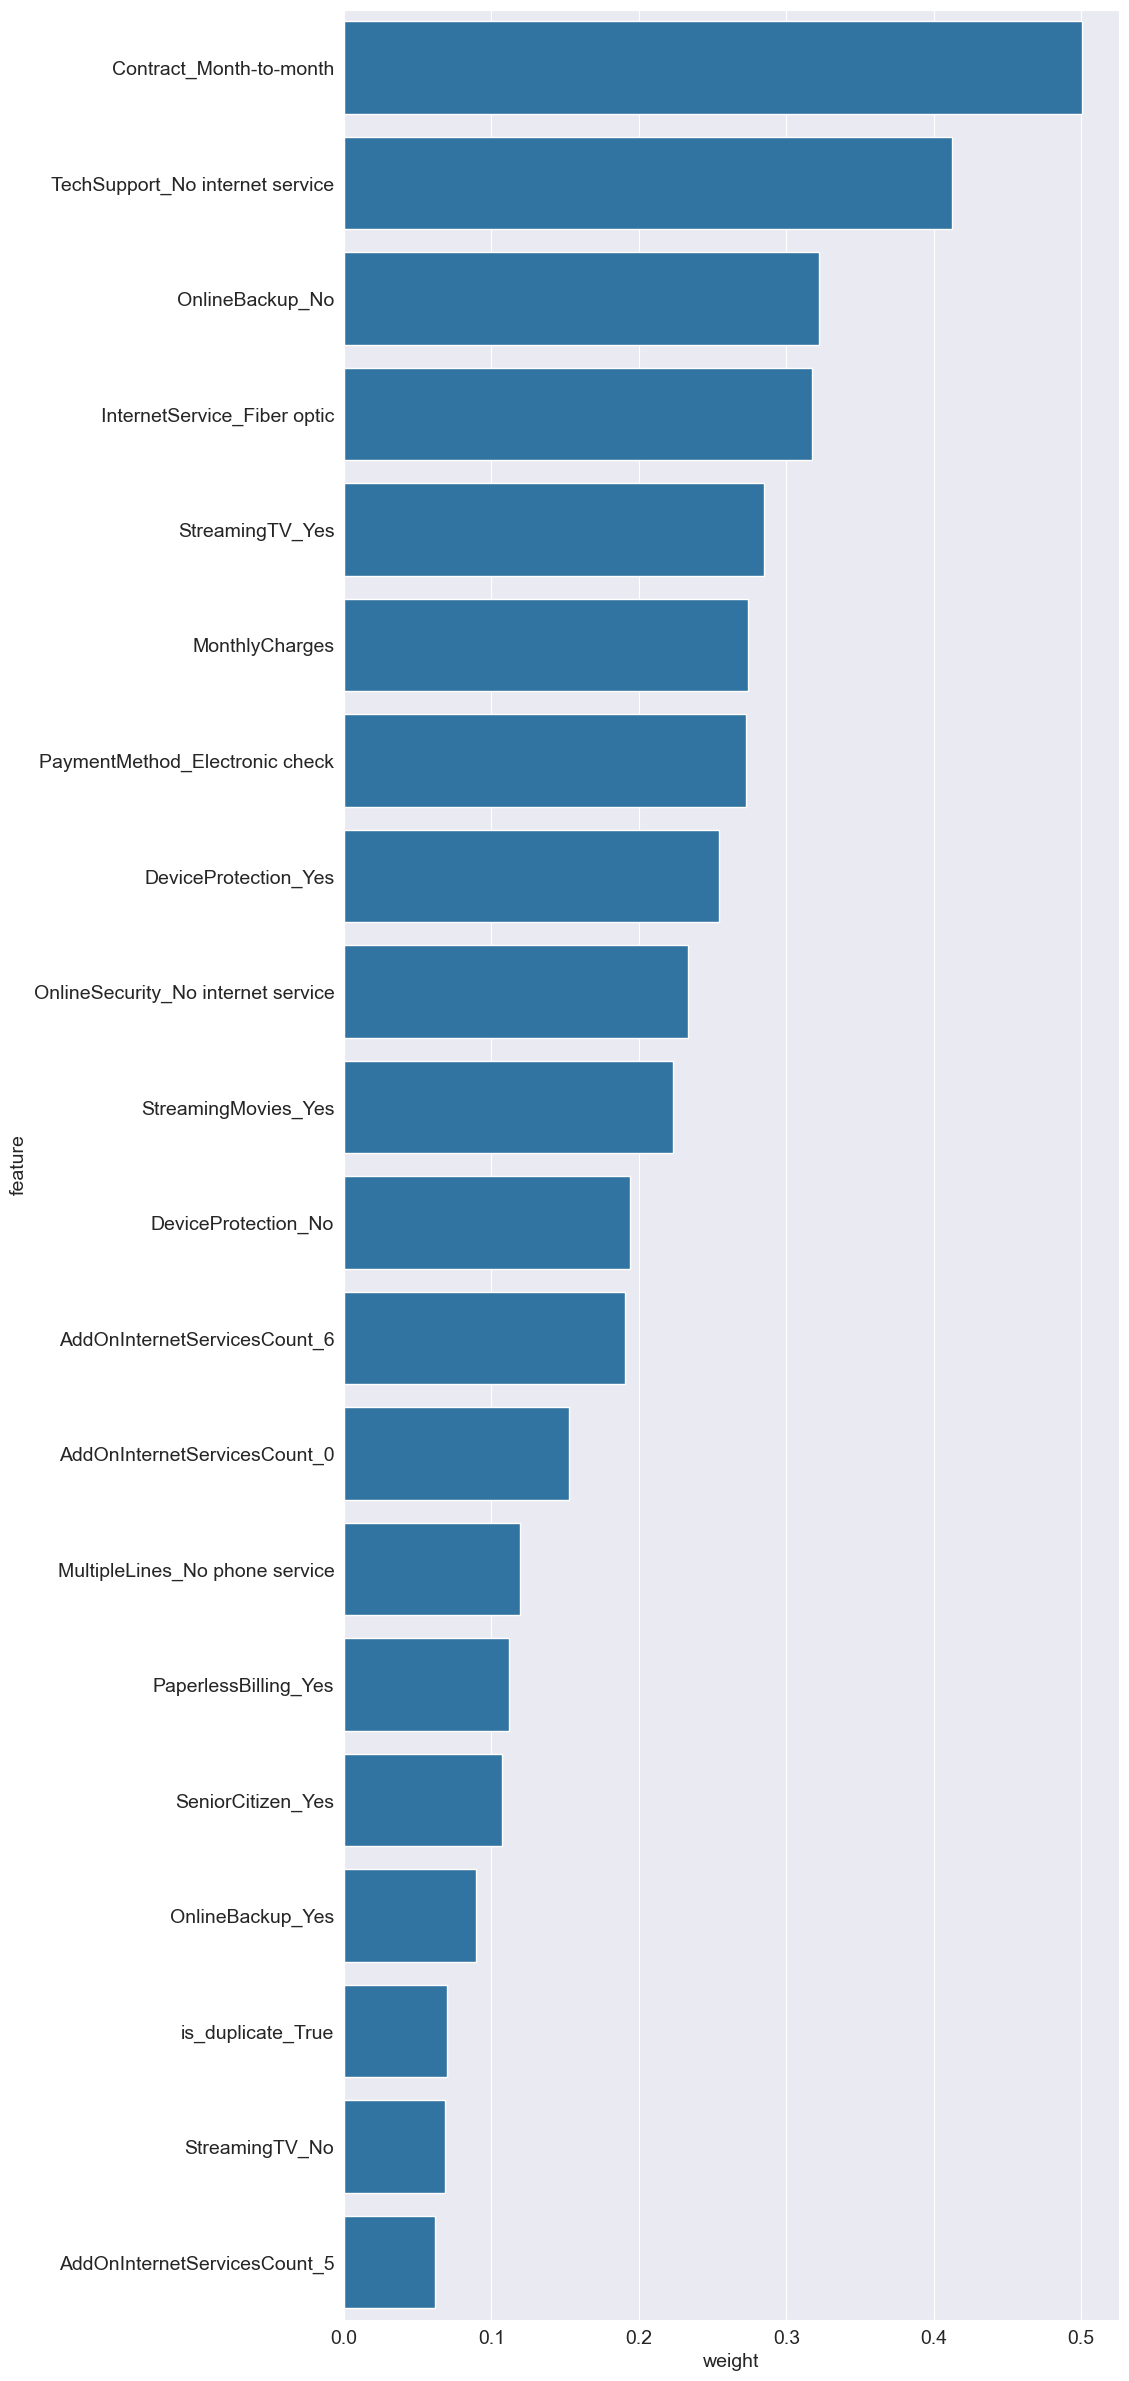

In [805]:
plt.figure(figsize=(10,30))
sns.barplot(data=weight_df.sort_values('weight', ascending=False).head(20), x= 'weight', y='feature')

In [806]:
print(model.intercept_)

[-0.09203862]


# Make Model Predictions

In [807]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

train_preds = model.predict(X_train)

# Probablistic Predictions
train_proba = model.predict_proba(X_train)
train_proba

array([[0.51011209, 0.48988791],
       [0.55143157, 0.44856843],
       [0.79133105, 0.20866895],
       ...,
       [0.95386617, 0.04613383],
       [0.98293353, 0.01706647],
       [0.78100543, 0.21899457]], shape=(4859, 2))

# Score

In [808]:
from sklearn.metrics import accuracy_score, confusion_matrix

print('accuracy_score:', accuracy_score(train_targets, train_preds))

confusion_matrix(train_targets, train_preds, normalize = 'true')

accuracy_score: 0.7826713315497016


array([[0.90053993, 0.09946007],
       [0.52686567, 0.47313433]])

In [809]:
def predict_and_plot(inputs, targets, name= ''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy*100))

    cf = confusion_matrix(targets, preds, normalize = 'true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confuction Matrix'.format(name));

    return preds


Accuracy: 78.27%


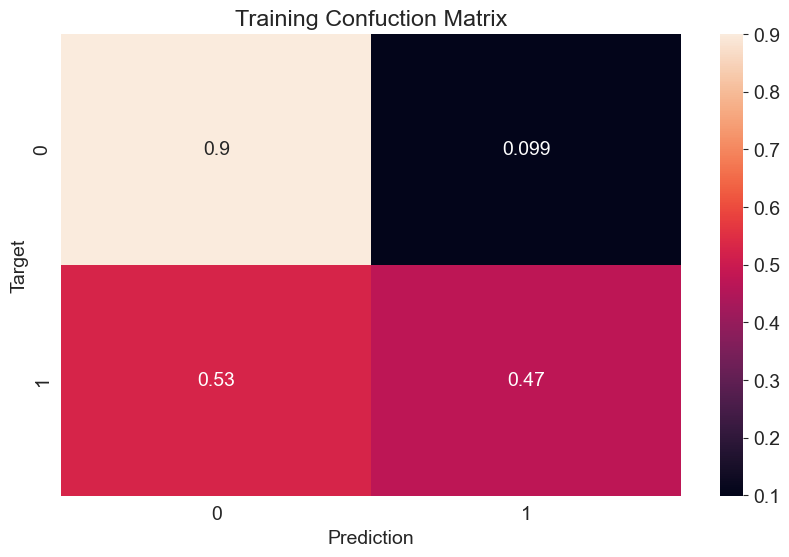

In [810]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 79.07%


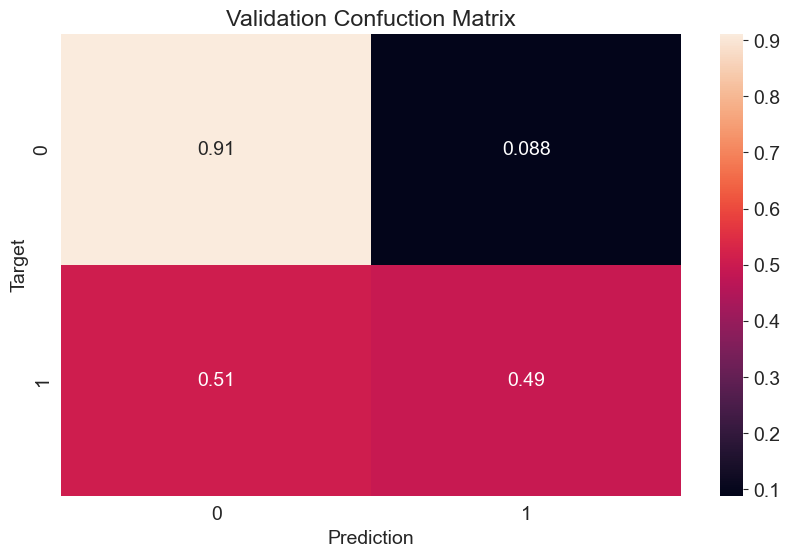

In [811]:
val_preds = predict_and_plot(X_val, val_targets, 'Validation')

Accuracy: 76.98%


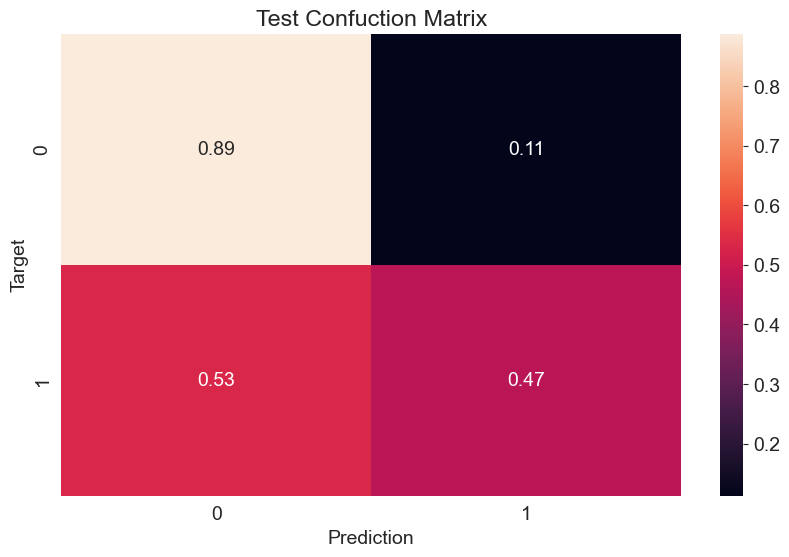

In [812]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

In [813]:
def random_guess(inputs):
    return np.random.choice(["No", "Yes"], len(inputs))

def all_no(inputs):
    return np.full(len(inputs), "No")   

In [814]:
accuracy_score(test_targets, random_guess(X_test))

0.4919753086419753

In [815]:
accuracy_score(test_targets, all_no(X_test))

0.7191358024691358

## Model Iteration 1
#### ON TRAIN_DATA:
 accuracy_score: 0.7826
confusion matrix:

array([[0.900, 0.099],
       [0.527, 0.473]])

#### ON VAL_DATA:
 accuracy_score: 0.7907
confusion matrix:

array([[0.91, 0.088],
       [0.51, 0.49]])

#### ON TEST_DATA:
 accuracy_score: 0.7698
confusion matrix:

array([[0.89, 0.11],
       [0.53, 0.47]])


# Accuracy_score for Random_guess: 0.5092
# Accuracy_score for all_nos: 0.7191 


### Observation: My True Positives and False Negatives are Bad!!!


### Next Action Items: 
1. ROC_AUC_SCORE  and Curve
2. Recal (churn = Yes)
3. Precision and F1

## METRICS: ROC-AUC, ROC Curve plot, Precision, Recall and F1

In [816]:
from sklearn.metrics import ( roc_auc_score, roc_curve, precision_score, recall_score, f1_score, classification_report)


def evaluate_binary_classification(model, X, y_true, positive_label="Yes", name=""):
    """
    Works even when y_true is string labels ('Yes'/'No').
    Uses model.predict_proba for ROC-AUC + ROC curve.
    """
    # Predicted class labels
    y_pred = model.predict(X)

    # Probability of the positive class
    # model.classes_ gives ordering of columns in predict_proba
    classes = list(model.classes_)
    if positive_label not in classes:
        raise ValueError(f"positive_label='{positive_label}' not in model.classes_={classes}")

    pos_idx = classes.index(positive_label)
    y_proba = model.predict_proba(X)[:, pos_idx]

    # Binary ground truth for ROC AUC
    y_true_bin = (np.array(y_true) == positive_label).astype(int)

    metrics = {
        "roc_auc": roc_auc_score(y_true_bin, y_proba),
        "precision": precision_score(y_true, y_pred, pos_label=positive_label, zero_division=0),
        "recall": recall_score(y_true, y_pred, pos_label=positive_label, zero_division=0),
        "f1": f1_score(y_true, y_pred, pos_label=positive_label, zero_division=0),
        "report": classification_report(y_true, y_pred, zero_division=0)
    }

    print(f"\n=== {name} Metrics (positive='{positive_label}') ===")
    for k in ["roc_auc", "precision", "recall", "f1"]:
        print(f"{k}: {metrics[k]:.4f}")
    print("\nClassification report:\n", metrics["report"])

    return metrics, y_proba

In [817]:
# ROC Curve Plot
def plot_roc_curve(y_true, y_proba, positive_label="Yes", name=""):
    y_true_bin = (np.array(y_true) == positive_label).astype(int)
    fpr, tpr, thresholds = roc_curve(y_true_bin, y_proba)

    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC: {name}")
    plt.plot([0, 1], [0, 1], linestyle="--", label="Random")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve ({name})")
    plt.legend()
    plt.show()


=== Training Metrics (positive='Yes') ===
roc_auc: 0.8098
precision: 0.6443
recall: 0.4731
f1: 0.5456

Classification report:
               precision    recall  f1-score   support

          No       0.82      0.90      0.86      3519
         Yes       0.64      0.47      0.55      1340

    accuracy                           0.78      4859
   macro avg       0.73      0.69      0.70      4859
weighted avg       0.77      0.78      0.77      4859



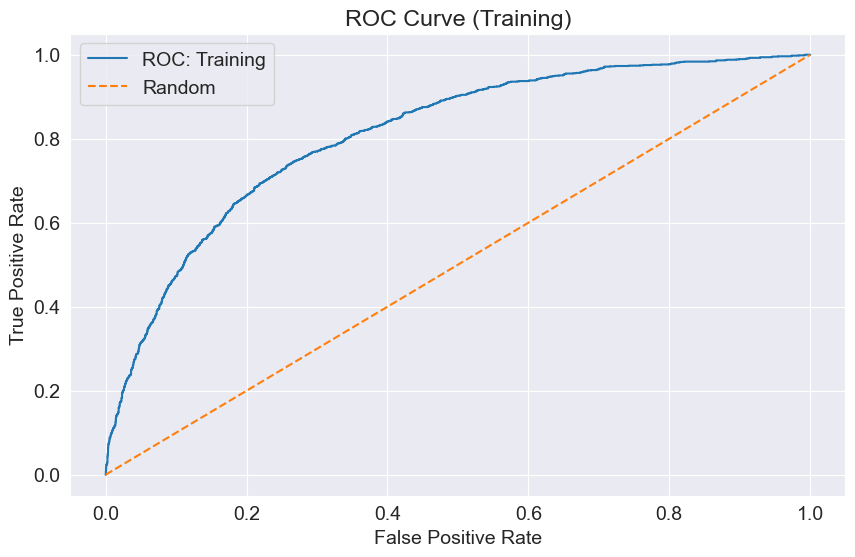

In [818]:
Train_metrics, train_proba = evaluate_binary_classification( model, X_train, train_targets, positive_label="Yes", name="Training")
plot_roc_curve(train_targets, train_proba,positive_label="Yes", name="Training")


=== Validation Metrics (positive='Yes') ===
roc_auc: 0.8134
precision: 0.6918
recall: 0.4914
f1: 0.5747

Classification report:
               precision    recall  f1-score   support

          No       0.82      0.91      0.86      1154
         Yes       0.69      0.49      0.57       466

    accuracy                           0.79      1620
   macro avg       0.75      0.70      0.72      1620
weighted avg       0.78      0.79      0.78      1620



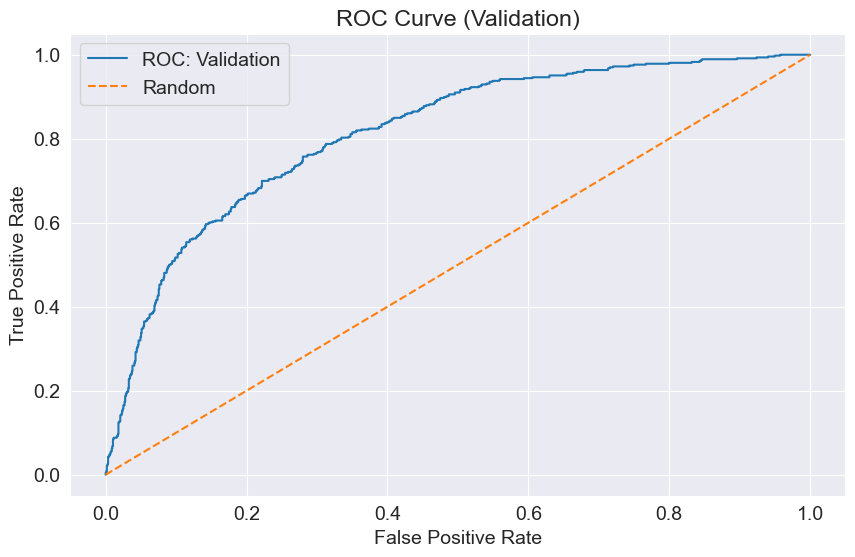

In [819]:
Val_metrics, val_proba = evaluate_binary_classification( model, X_val, val_targets, positive_label="Yes", name="Validation")
plot_roc_curve(val_targets, val_proba,positive_label="Yes", name="Validation")


=== Test Metrics (positive='Yes') ===
roc_auc: 0.7908
precision: 0.6192
recall: 0.4681
f1: 0.5332

Classification report:
               precision    recall  f1-score   support

          No       0.81      0.89      0.85      1165
         Yes       0.62      0.47      0.53       455

    accuracy                           0.77      1620
   macro avg       0.71      0.68      0.69      1620
weighted avg       0.76      0.77      0.76      1620



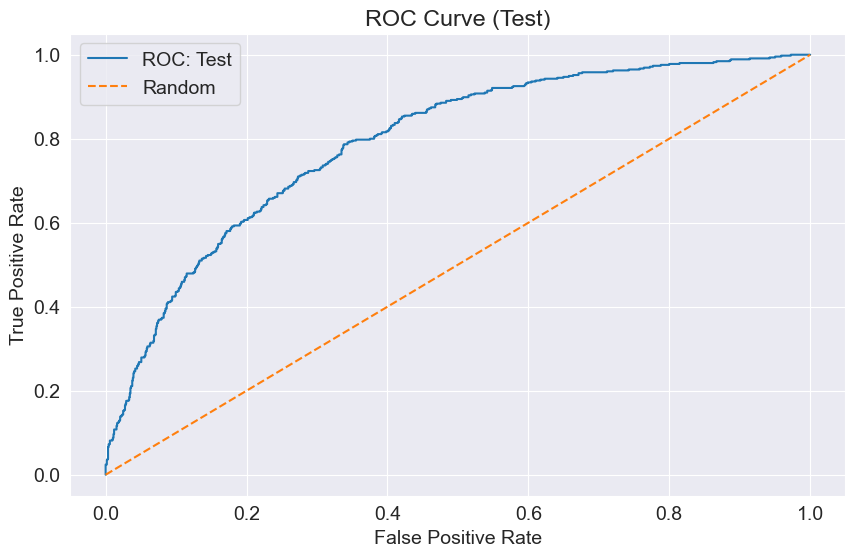

In [820]:
test_metrics, test_proba = evaluate_binary_classification( model, X_test, test_targets, positive_label="Yes", name="Test")
plot_roc_curve(test_targets, test_proba,positive_label="Yes", name="Test")

# THRESHOLD ANALYSIS

In [821]:
# Use the exact same feature columns you used during fit()
FEATURE_COLS = numeric_cols + encoded_cols

X_train = train_inputs[FEATURE_COLS]
X_val   = val_inputs[FEATURE_COLS]
X_test  = test_inputs[FEATURE_COLS]

y_train = train_targets
y_val   = val_targets
y_test  = test_targets

print("Shapes:", X_train.shape, X_val.shape, X_test.shape)
print("Model classes_:", list(model.classes_))

Shapes: (4859, 62) (1620, 62) (1620, 62)
Model classes_: ['No', 'Yes']


In [822]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
)

def get_positive_label(model, preferred="Yes"):
    classes = list(model.classes_)
    if preferred in classes:
        return preferred
    # fallback: binary classifiers usually have classes_[1] as "positive"
    if len(classes) == 2:
        return classes[1]
    raise ValueError(f"Cannot infer positive label from classes_={classes}")

POS_LABEL = get_positive_label(model, preferred="Yes")
NEG_LABEL = [c for c in model.classes_ if c != POS_LABEL][0]

def get_pos_proba(model, X, pos_label=POS_LABEL):
    proba = model.predict_proba(X)
    classes = list(model.classes_)
    pos_idx = classes.index(pos_label)
    return proba[:, pos_idx]

def predict_with_threshold(proba_pos, threshold, pos_label=POS_LABEL, neg_label=NEG_LABEL):
    return np.where(proba_pos >= threshold, pos_label, neg_label)

def metrics_at_threshold(y_true, y_pred, pos_label=POS_LABEL):
    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision_yes": precision_score(y_true, y_pred, pos_label=pos_label, zero_division=0),
        "recall_yes": recall_score(y_true, y_pred, pos_label=pos_label, zero_division=0),
        "f1_yes": f1_score(y_true, y_pred, pos_label=pos_label, zero_division=0),
    }

print("POS_LABEL =", POS_LABEL, "| NEG_LABEL =", NEG_LABEL)

POS_LABEL = Yes | NEG_LABEL = No


In [823]:
thresholds = [0.50, 0.45, 0.40, 0.35, 0.30, 0.25]

val_proba = get_pos_proba(model, X_val, pos_label=POS_LABEL)

rows = []
for thr in thresholds:
    val_pred = predict_with_threshold(val_proba, thr, pos_label=POS_LABEL, neg_label=NEG_LABEL)
    m = metrics_at_threshold(y_val, val_pred, pos_label=POS_LABEL)

    cm = confusion_matrix(y_val, val_pred, labels=[NEG_LABEL, POS_LABEL])
    tn, fp, fn, tp = cm.ravel()

    rows.append({
        "threshold": thr,
        **m,
        "tn": int(tn), "fp": int(fp), "fn": int(fn), "tp": int(tp),
        "flagged_yes": int((val_pred == POS_LABEL).sum())
    })

val_sweep = pd.DataFrame(rows).sort_values("threshold", ascending=False).reset_index(drop=True)
val_sweep

,threshold,accuracy,precision_yes,recall_yes,f1_yes,tn,fp,fn,tp,flagged_yes
0,0.50,0.790741,0.691843,0.491416,0.574655,1052,102,237,229,331
1,0.45,0.790123,0.661538,0.553648,0.602804,1022,132,208,258,390
2,0.40,0.774074,0.607759,0.605150,0.606452,972,182,184,282,464
3,0.35,0.761111,0.573832,0.658798,0.613387,926,228,159,307,535
4,0.30,0.745679,0.544850,0.703863,0.614232,880,274,138,328,602
5,0.25,0.727160,0.517493,0.761803,0.616319,823,331,111,355,686


### Option A: Choose threshold by Max F1 on Validation

In [830]:
best_thr_A = float(val_sweep.loc[val_sweep["f1_yes"].idxmax(), "threshold"])
best_row_A = val_sweep[val_sweep["threshold"] == best_thr_A].iloc[0].to_dict()

best_thr_A, best_row_A

(0.25,
 {'threshold': 0.25,
  'accuracy': 0.7271604938271605,
  'precision_yes': 0.5174927113702624,
  'recall_yes': 0.7618025751072961,
  'f1_yes': 0.6163194444444444,
  'tn': 823.0,
  'fp': 331.0,
  'fn': 111.0,
  'tp': 355.0,
  'flagged_yes': 686.0})

### Option B: Rule-based threshold (business-friendly)

In [831]:
MIN_RECALL = 0.60
MIN_PRECISION = 0.50

candidates = val_sweep[(val_sweep["recall_yes"] >= MIN_RECALL) & (val_sweep["precision_yes"] >= MIN_PRECISION)]

if len(candidates) > 0:
    # choose highest threshold among acceptable ones (more conservative)
    best_thr_B = float(candidates.sort_values("threshold", ascending=False).iloc[0]["threshold"])
else:
    best_thr_B = best_thr_A  # fallback

best_thr_B, candidates

(0.4,
    threshold  accuracy  precision_yes  recall_yes    f1_yes   tn   fp   fn  \
 2       0.40  0.774074       0.607759    0.605150  0.606452  972  182  184   
 3       0.35  0.761111       0.573832    0.658798  0.613387  926  228  159   
 4       0.30  0.745679       0.544850    0.703863  0.614232  880  274  138   
 5       0.25  0.727160       0.517493    0.761803  0.616319  823  331  111   
 
     tp  flagged_yes  
 2  282          464  
 3  307          535  
 4  328          602  
 5  355          686  )

### Final report on Test set (using chosen threshold)

In [826]:
CHOSEN_THRESHOLD = best_thr_B 
print("Chosen threshold:", CHOSEN_THRESHOLD)

test_proba = get_pos_proba(model, X_test, pos_label=POS_LABEL)
test_pred  = predict_with_threshold(test_proba, CHOSEN_THRESHOLD, pos_label=POS_LABEL, neg_label=NEG_LABEL)

test_metrics = metrics_at_threshold(y_test, test_pred, pos_label=POS_LABEL)

# ROC-AUC is threshold-independent
test_auc = roc_auc_score((y_test == POS_LABEL).astype(int), test_proba)

print("=== Test Metrics at chosen threshold ===")
print({**test_metrics, "roc_auc": float(test_auc)})

Chosen threshold: 0.4
=== Test Metrics at chosen threshold ===
{'accuracy': 0.7561728395061729, 'precision_yes': 0.5627615062761506, 'recall_yes': 0.5912087912087912, 'f1_yes': 0.5766345123258306, 'roc_auc': 0.7907796066594349}


### Threshold Selection & Business Justification

In this Telco churn prediction, cost of missing a true churner (false negative) is typically higher than cost of contacting a non-churner (false positive). Therefore, recall for churners is prioritized while maintaining acceptable precision to control outreach costs.

Evaluated multiple thresholds on the validation dataset:
	•	Higher thresholds (e.g., 0.50) are conservative but miss a large portion of churners.
	•	Lower thresholds improve recall but significantly increase false positives and campaign size.

At a threshold of 0.40, the model achieves:
	•	Recall (Yes): ~61%
	•	Precision (Yes): ~61%
	•	A balanced F1 score
	•	A manageable number of customers flagged for retention

Selected threshold: 0.40

This threshold provides a strong balance between churn capture and campaign efficiency, making it suitable for real-world retention use cases.

### Confustion Matrix at 0.4 threshold (TEST)

In [832]:
cm = confusion_matrix(y_test, test_pred, labels=[NEG_LABEL, POS_LABEL])
cm_df = pd.DataFrame(cm, index=[f"Actual_{NEG_LABEL}", f"Actual_{POS_LABEL}"],
                     columns=[f"Pred_{NEG_LABEL}", f"Pred_{POS_LABEL}"])
cm_df

,Pred_No,Pred_Yes
Actual_No,956,209
Actual_Yes,186,269


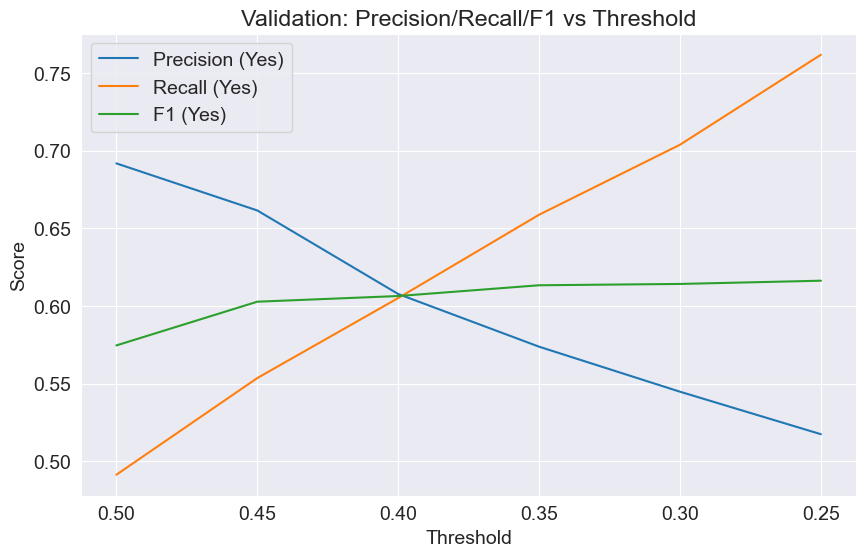

In [833]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(val_sweep["threshold"], val_sweep["precision_yes"], label="Precision (Yes)")
plt.plot(val_sweep["threshold"], val_sweep["recall_yes"], label="Recall (Yes)")
plt.plot(val_sweep["threshold"], val_sweep["f1_yes"], label="F1 (Yes)")
plt.gca().invert_xaxis()  # higher threshold on left, lower on right
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Validation: Precision/Recall/F1 vs Threshold")
plt.legend()
plt.show()

In [842]:
# Save the model , scaler, and encoder for future use

import joblib
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
MODEL_DIR = PROJECT_ROOT/ "models"
MODEL_DIR.mkdir(exist_ok=True)

joblib.dump(model, MODEL_DIR / "churn_lr_model.pkl")
joblib.dump(scaler, MODEL_DIR / "scaler.pkl")
joblib.dump(encoder, MODEL_DIR / "encoder.pkl")

print("✅ Model, scaler, encoder saved")

✅ Model, scaler, encoder saved


In [843]:
import json
# Save feature columns used during training

feature_columns = numeric_cols + encoded_cols

with open(MODEL_DIR / "feature_columns.json", "w") as f:
    json.dump(feature_columns, f, indent=2)

print(f"✅ Saved {len(feature_columns)} feature columns")

✅ Saved 62 feature columns


In [ ]:
# Save model metadata
model_metadata = {
    "model_type": "LogisticRegression",
    "positive_class": POS_LABEL,
    "chosen_threshold": CHOSEN_THRESHOLD,
    "roc_auc_test": round(test_auc, 4),
    "test_metrics_at_threshold": test_metrics,
    "train_size": len(train_targets),
    "val_size": len(val_targets),
    "test_size": len(test_targets),
}

with open(MODEL_DIR / "model_metadata.json", "w") as f:
    json.dump(model_metadata, f, indent=2)

print("✅ Model metadata saved")

✅ Model metadata saved


In [845]:
# Reload everything to ensure artifacts are valid
loaded_model = joblib.load(MODEL_DIR / "churn_lr_model.pkl")
loaded_scaler = joblib.load(MODEL_DIR / "scaler.pkl")
loaded_encoder = joblib.load(MODEL_DIR / "encoder.pkl")

with open(MODEL_DIR / "feature_columns.json") as f:
    loaded_features = json.load(f)

assert loaded_features == feature_columns
print("✅ Reload check passed")

✅ Reload check passed


# v0.6 Feature Experiments
### Feature Engineering Comparison

In [875]:
import sys
from pathlib import Path

repo_root = Path.cwd()
if repo_root.name == "notebooks":
    repo_root = repo_root.parent

sys.path.insert(0, str(repo_root))

from src.features.build_features import build_features

# E0: baseline (no new features)
train_E0 = train_df.copy()
val_E0   = val_df.copy()
test_E0  = test_df.copy()

# E1: + TenureBin
train_E1 = build_features(train_df, add_tenure_bin=True, add_avg_monthly=False)
val_E1   = build_features(val_df,   add_tenure_bin=True, add_avg_monthly=False)
test_E1  = build_features(test_df,  add_tenure_bin=True, add_avg_monthly=False)

# E2: + AvgMonthlyFromTotal
train_E2 = build_features(train_df, add_tenure_bin=False, add_avg_monthly=True)
val_E2   = build_features(val_df,   add_tenure_bin=False, add_avg_monthly=True)
test_E2  = build_features(test_df,  add_tenure_bin=False, add_avg_monthly=True)

# E3: + TenureBin + AvgMonthlyFromTotal
train_E3 = build_features(train_df, add_tenure_bin=True, add_avg_monthly=True)
val_E3   = build_features(val_df,   add_tenure_bin=True, add_avg_monthly=True)
test_E3  = build_features(test_df,  add_tenure_bin=True, add_avg_monthly=True)

## v0.6 — Train-only fit per experiment, compare metrics (same chosen threshold)


In [876]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

POS_LABEL = "Yes"          # positive class label
THRESHOLD = 0.4            # chosen business threshold

def _prepare_xy(df, target_col="Churn"):
    y = df[target_col].astype("string")
    X = df.drop(columns=[target_col]).copy()
    return X, y

def _pos_proba(model, X, positive_label=POS_LABEL):
    proba = model.predict_proba(X)
    classes = list(model.classes_)
    pos_idx = classes.index(positive_label)
    return proba[:, pos_idx]

def _eval(y_true, y_proba, thr=THRESHOLD, positive_label=POS_LABEL):
    y_true = y_true.astype("string")
    y_pred = np.where(y_proba >= thr, positive_label, "No")

    roc = roc_auc_score((y_true == positive_label).astype(int), y_proba)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, pos_label=positive_label, zero_division=0)
    rec  = recall_score(y_true, y_pred, pos_label=positive_label, zero_division=0)
    f1   = f1_score(y_true, y_pred, pos_label=positive_label, zero_division=0)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=["No", positive_label]).ravel()

    return {
        "roc_auc": float(roc),
        "accuracy": float(acc),
        "precision_yes": float(prec),
        "recall_yes": float(rec),
        "f1_yes": float(f1),
        "tn": int(tn), "fp": int(fp), "fn": int(fn), "tp": int(tp),
        "flagged_yes": int((y_proba >= thr).sum()),
    }

def run_experiment(name, train_df, val_df, test_df, base_numeric_cols, base_categorical_cols, thr=THRESHOLD):
    Xtr, ytr = _prepare_xy(train_df)
    Xv, yv   = _prepare_xy(val_df)
    Xt, yt   = _prepare_xy(test_df)

    # Extend feature lists only if engineered columns exist in this experiment
    num_cols = [c for c in base_numeric_cols if c in Xtr.columns]
    cat_cols = [c for c in base_categorical_cols if c in Xtr.columns]

    if "AvgMonthlyFromTotal" in Xtr.columns and "AvgMonthlyFromTotal" not in num_cols:
        num_cols.append("AvgMonthlyFromTotal")
    if "TenureBin" in Xtr.columns and "TenureBin" not in cat_cols:
        cat_cols.append("TenureBin")

    used = set(num_cols) | set(cat_cols)
    passthrough_cols = [c for c in Xtr.columns if c not in used]

    # Drop ID-like passthrough columns that would break LR
    id_like = {"customerID", "customerId", "CustomerID"}
    passthrough_cols = [c for c in passthrough_cols if c not in id_like]

    # Also drop any remaining object/string passthrough columns 
    passthrough_cols = [
        c for c in passthrough_cols
        if not (Xtr[c].dtype == "object" or str(Xtr[c].dtype).startswith("string"))
    ]

    # ---- Fit on TRAIN only ----
    scaler = MinMaxScaler()
    if num_cols:
        scaler.fit(Xtr[num_cols])
        Xtr_num = pd.DataFrame(scaler.transform(Xtr[num_cols]), columns=num_cols, index=Xtr.index)
        Xv_num  = pd.DataFrame(scaler.transform(Xv[num_cols]),  columns=num_cols, index=Xv.index)
        Xt_num  = pd.DataFrame(scaler.transform(Xt[num_cols]),  columns=num_cols, index=Xt.index)
    else:
        Xtr_num, Xv_num, Xt_num = (pd.DataFrame(index=Xtr.index), pd.DataFrame(index=Xv.index), pd.DataFrame(index=Xt.index))

    encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
    if cat_cols:
        encoder.fit(Xtr[cat_cols])
        enc_cols = list(encoder.get_feature_names_out(cat_cols))
        Xtr_cat = pd.DataFrame(encoder.transform(Xtr[cat_cols]), columns=enc_cols, index=Xtr.index)
        Xv_cat  = pd.DataFrame(encoder.transform(Xv[cat_cols]),  columns=enc_cols, index=Xv.index)
        Xt_cat  = pd.DataFrame(encoder.transform(Xt[cat_cols]),  columns=enc_cols, index=Xt.index)
    else:
        Xtr_cat, Xv_cat, Xt_cat = (pd.DataFrame(index=Xtr.index), pd.DataFrame(index=Xv.index), pd.DataFrame(index=Xt.index))

    # passthrough (bool -> int; keep the rest)
    def _pt(dfX):
        out = dfX[passthrough_cols].copy()
        for c in out.columns:
            if out[c].dtype == bool:
                out[c] = out[c].astype("int64")
        return out

    Xtr_pt, Xv_pt, Xt_pt = _pt(Xtr), _pt(Xv), _pt(Xt)

    Xtr_final = pd.concat([Xtr_num, Xtr_cat, Xtr_pt], axis=1)
    Xv_final  = pd.concat([Xv_num,  Xv_cat,  Xv_pt], axis=1)
    Xt_final  = pd.concat([Xt_num,  Xt_cat,  Xt_pt], axis=1)
    
    model = LogisticRegression(max_iter=3000)
    model.fit(Xtr_final, ytr)

    v_proba = _pos_proba(model, Xv_final)
    t_proba = _pos_proba(model, Xt_final)

    v = _eval(yv, v_proba, thr=thr)
    t = _eval(yt, t_proba, thr=thr)
    
    artifacts = {
        "model": model,
        "scaler": scaler,
        "encoder": encoder,
        "feature_names": Xtr_final.columns.tolist(),
        "threshold": float(thr),
        "num_cols": num_cols,
        "cat_cols": cat_cols,
        "passthrough_cols": passthrough_cols,
    }   

    results_dict = {
        "experiment": name,
        "threshold": float(thr),

        "val_roc_auc": v["roc_auc"],
        "val_precision_yes": v["precision_yes"],
        "val_recall_yes": v["recall_yes"],
        "val_f1_yes": v["f1_yes"],
        "val_accuracy": v["accuracy"],
        "val_flagged_yes": v["flagged_yes"],

        "test_roc_auc": t["roc_auc"],
        "test_precision_yes": t["precision_yes"],
        "test_recall_yes": t["recall_yes"],
        "test_f1_yes": t["f1_yes"],
        "test_accuracy": t["accuracy"],
        "test_flagged_yes": t["flagged_yes"],

    }   

    return results_dict, artifacts

rows = []
artifacts_by_experiment = {}

for name, tr, va, te in [
    ("E0_baseline", train_E0, val_E0, test_E0),
    ("E1_plus_TenureBin", train_E1, val_E1, test_E1),
    ("E2_plus_AvgMonthlyFromTotal", train_E2, val_E2, test_E2),
    ("E3_plus_both", train_E3, val_E3, test_E3),
]:
    row, arts = run_experiment(name, tr, va, te, numeric_cols, categorical_cols, thr=THRESHOLD)
    rows.append(row)
    artifacts_by_experiment[name] = arts

fe_results = pd.DataFrame(rows).sort_values(by=["val_f1_yes", "val_roc_auc"], ascending=False)
fe_results

,experiment,threshold,val_roc_auc,val_precision_yes,val_recall_yes,val_f1_yes,val_accuracy,val_flagged_yes,test_roc_auc,test_precision_yes,test_recall_yes,test_f1_yes,test_accuracy,test_flagged_yes
1,E1_plus_TenureBin,0.4,0.816255,0.626126,0.596567,0.610989,0.781481,444,0.793415,0.561290,0.573626,0.567391,0.754321,465
3,E3_plus_both,0.4,0.816539,0.624719,0.596567,0.610318,0.780864,445,0.793558,0.561290,0.573626,0.567391,0.754321,465
2,E2_plus_AvgMonthlyFromTotal,0.4,0.813581,0.609071,0.605150,0.607104,0.774691,463,0.791080,0.560417,0.591209,0.575401,0.754938,480
0,E0_baseline,0.4,0.813380,0.609071,0.605150,0.607104,0.774691,463,0.791004,0.560417,0.591209,0.575401,0.754938,480


In [878]:
# %%
best_exp = fe_results.iloc[0]["experiment"]
best_art = artifacts_by_experiment[best_exp]
best_exp
print("Best feature set (ranked by VAL f1_yes then VAL roc_auc):")
print(f"  Experiment: {best['experiment']}")
print(f"  Threshold:  {best['threshold']}")
print(f"  VAL  f1_yes={best['val_f1_yes']:.4f}  precision={best['val_precision_yes']:.4f}  recall={best['val_recall_yes']:.4f}  roc_auc={best['val_roc_auc']:.4f}")
print(f"  TEST f1_yes={best['test_f1_yes']:.4f} precision={best['test_precision_yes']:.4f} recall={best['test_recall_yes']:.4f} roc_auc={best['test_roc_auc']:.4f}")
print(f"  TEST flagged_yes={int(best['test_flagged_yes'])} (customers flagged as churn-risk at this threshold)")

Best feature set (ranked by VAL f1_yes then VAL roc_auc):
  Experiment: E1_plus_TenureBin
  Threshold:  0.4
  VAL  f1_yes=0.6110  precision=0.6261  recall=0.5966  roc_auc=0.8163
  TEST f1_yes=0.5674 precision=0.5613 recall=0.5736 roc_auc=0.7934
  TEST flagged_yes=465 (customers flagged as churn-risk at this threshold)


# Final feature choice:

##### 1.E1_plus_TenureBin with Threshold @ 0.40
##### 2.Best validation F1
##### 3.Minimal added complexity
##### 4.Strong business interpretability
##### 5.No overfitting signal

##### “Adding tenure buckets improves churn detection with negligible operational cost.”



# Persist Artifacts

In [882]:
from src.models.persist_artifacts import save_artifacts


val_metrics = {
    "roc_auc": float(fe_results.loc[fe_results["experiment"] == best_exp, "val_roc_auc"].iloc[0]),
    "precision_yes": float(fe_results.loc[fe_results["experiment"] == best_exp, "val_precision_yes"].iloc[0]),
    "recall_yes": float(fe_results.loc[fe_results["experiment"] == best_exp, "val_recall_yes"].iloc[0]),
    "f1_yes": float(fe_results.loc[fe_results["experiment"] == best_exp, "val_f1_yes"].iloc[0]),
    "accuracy": float(fe_results.loc[fe_results["experiment"] == best_exp, "val_accuracy"].iloc[0]),
    "flagged_yes": int(fe_results.loc[fe_results["experiment"] == best_exp, "val_flagged_yes"].iloc[0]),
}

test_metrics = {
    "roc_auc": float(fe_results.loc[fe_results["experiment"] == best_exp, "test_roc_auc"].iloc[0]),
    "precision_yes": float(fe_results.loc[fe_results["experiment"] == best_exp, "test_precision_yes"].iloc[0]),
    "recall_yes": float(fe_results.loc[fe_results["experiment"] == best_exp, "test_recall_yes"].iloc[0]),
    "f1_yes": float(fe_results.loc[fe_results["experiment"] == best_exp, "test_f1_yes"].iloc[0]),
    "accuracy": float(fe_results.loc[fe_results["experiment"] == best_exp, "test_accuracy"].iloc[0]),
    "flagged_yes": int(fe_results.loc[fe_results["experiment"] == best_exp, "test_flagged_yes"].iloc[0]),
}

paths = save_artifacts(
    model=best_art["model"],
    scaler=best_art["scaler"],
    encoder=best_art["encoder"],
    feature_names=best_art["feature_names"],
    threshold=best_art["threshold"],
    out_dir=MODEL_DIR/"v0_6_best",
    run_name="v0_6_best",
    label_positive="Yes",
    metrics={"validation": val_metrics, "test": test_metrics},
    extra_metadata={
        "best_experiment": best_exp,
        "num_cols_used": best_art["num_cols"],
        "cat_cols_used": best_art["cat_cols"],
        "passthrough_cols_used": best_art["passthrough_cols"],
    },
)

paths

{'model_path': '/Users/abila/Documents/Coding Projects/my ML Engineering Projects 2025/Project 1 - Customer Churn Prediction + Data Quality/customer-churn-dq/models/v0_6_best/lr_v0_6_best.joblib',
 'preprocess_path': '/Users/abila/Documents/Coding Projects/my ML Engineering Projects 2025/Project 1 - Customer Churn Prediction + Data Quality/customer-churn-dq/models/v0_6_best/preprocess_v0_6_best.joblib',
 'card_path': '/Users/abila/Documents/Coding Projects/my ML Engineering Projects 2025/Project 1 - Customer Churn Prediction + Data Quality/customer-churn-dq/models/v0_6_best/model_card_v0_6_best.json'}

In [892]:
from src.models.persist_artifacts import load_artifacts

MODEL_DIR = PROJECT_ROOT/ "models/v0_6_best"

model, scaler, encoder, feature_names, threshold, model_card = load_artifacts(
    out_dir=MODEL_DIR,
    run_name="v0_6_best",
)

threshold, model_card.get("best_experiment")

(0.4, None)